In [1]:
import snscrape.modules.twitter as stwitter
import pandas as pd
import numpy as np
import pickle as pkl 
from datetime import datetime
import datetime as dt
import string 
import re 
import emoji 


import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')
from nltk.corpus import stopwords

from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import WordNetLemmatizer


from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.util import ngrams

import scattertext as st 
from IPython.display import IFrame
from IPython.core.display import display, HTML

import spacy 



from itertools import combinations
from sklearn import decomposition
import gensim 

from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams

sns.set_style= ('white')
#plt.style.use("ggplot")

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/hannahkim/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hannahkim/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_pickle('topic_modling.pkl')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28873 entries, 0 to 28872
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   datetime            28873 non-null  datetime64[ns, UTC]
 1   url                 28873 non-null  object             
 2   content             28873 non-null  object             
 3   username            28873 non-null  object             
 4   like_count          28873 non-null  int64              
 5   clean_text          28873 non-null  object             
 6   clean_text_lem      28873 non-null  object             
 7   Healthy Diet        28873 non-null  float64            
 8   Fake Food           28873 non-null  float64            
 9   Brand Deal          28873 non-null  float64            
 10  Processed Food      28873 non-null  float64            
 11  Products            28873 non-null  float64            
 12  Alternative Option  28873 non-nu

REMOVE Stop Words

In [4]:
add_stopwords = ['meat', 'vegan', 'plant', 'based', 'amp', 'don', 'wa', 'ha', 'le', 'lol']
stopwrd = stopwords.words('english')
stopwrd.extend(add_stopwords)

with open('metis_stopwrd.py', 'r') as f:
    lines = [line.strip() for line in f]
stopwrd.extend(lines)

In [5]:
#figure #figure out how to remove stop words in clean text before lem 
#figure out how to properly lemmatize using POS tag out lemmatizing -- pos tag IF TIME 



In [6]:
def sentiment_score(text):
    score = SentimentIntensityAnalyzer()

    score_number = score.polarity_scores(text)
    compound_score = score_number['compound']

    return compound_score
df['sentiment_score'] = df.content.apply(sentiment_score)  

In [7]:
#function that calc sentiment across all rows -- will be either positive or negative 
def sentiment_label(score):
    if score >= 0.05: 
        score = 'positive'
        return score
    elif score < 0.05 and score > -0.05:
        score = 'neutral'
        return score 
    elif score <= -0.05: 
        score = 'negative'
        return score 
df['sentiment_label'] = df.sentiment_score.apply(sentiment_label)  

In [8]:
df.head()

,datetime,url,content,username,like_count,clean_text,clean_text_lem,Healthy Diet,Fake Food,Brand Deal,...,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title,topic_term,ym_date,sentiment_score,sentiment_label
0,2020-01-01 00:00:43+00:00,https://twitter.com/helloamygarner/status/1212...,I stopped being a meat-loving disaster in the ...,helloamygarner,0,i stopped being a meat loving disaster in the ...,i stopped being a meat loving disaster in the ...,0.000,0.000,0.001,...,0.000,0.0,0.001,0.003,5,Alternative Option,"[alternative, free, cheese, option, dairy, mea...",2020-01,-0.5422,negative
1,2020-01-01 00:04:29+00:00,https://twitter.com/Taertebjerg/status/1212162...,Arnold Schwarzenegger has ditched meat and dai...,Taertebjerg,0,arnold schwarzenegger has ditched meat and dai...,arnold schwarzenegger ha ditched meat and dair...,0.007,0.003,0.000,...,0.000,0.0,0.000,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, mea...",2020-01,0.0000,neutral
2,2020-01-01 00:31:12+00:00,https://twitter.com/plantpowercoupl/status/121...,What?!?!?!?!?!?!?\n\nFYI - this is one of thos...,plantpowercoupl,3,what fyi this is one of those people who say p...,what fyi this is one of those people who say p...,0.020,0.002,0.000,...,0.000,0.0,0.000,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, mea...",2020-01,0.8206,positive
3,2020-01-01 00:31:33+00:00,https://twitter.com/FurForceFive/status/121216...,Reducing your meat &amp; dairy intake can help...,FurForceFive,1,reducing your meat amp dairy intake can help m...,reducing your meat amp dairy intake can help m...,0.002,0.001,0.000,...,0.007,0.0,0.000,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, mea...",2020-01,0.2023,positive
4,2020-01-01 01:32:27+00:00,https://twitter.com/CatMumof4/status/121218478...,@KFC_UKI What plant based products will be use...,CatMumof4,0,what plant based products will be used i m ho...,what plant based product will be used i m hop...,0.001,0.003,0.000,...,0.006,0.0,0.003,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, mea...",2020-01,0.8925,positive


In [9]:
df.sentiment_label.value_counts()

positive    16560
negative     7453
neutral      4860
Name: sentiment_label, dtype: int64

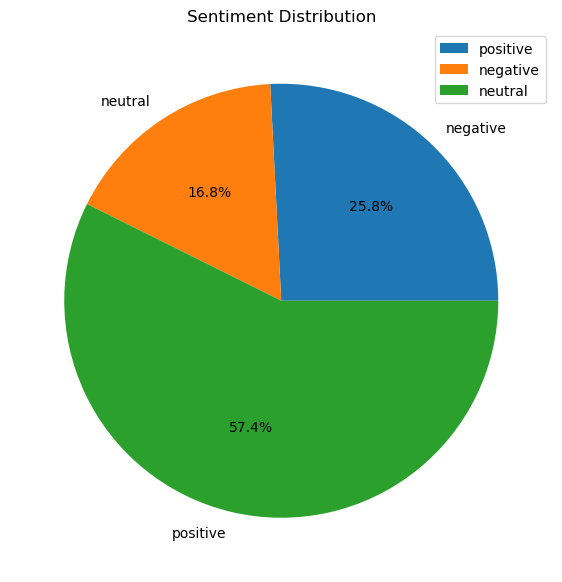

In [14]:
#sns.countplot(df.sentiment_label.value_counts(),hue = 'sentiment_lable')
import matplotlib.patches as mpatches

df.groupby('sentiment_label').size().plot(kind='pie', figsize=(7, 10), autopct='%1.1f%%')


plt.title("Sentiment Distribution")
plt.xlabel('')
plt.ylabel('')

#a = mpatches.Patch(color='blue', label='positive')
#b = mpatches.Patch(color='orange', label='negative')

plt.legend(labels= ['positive', 'negative', 'neutral'], loc='best')


#plt.legend(labels = legend_labels, loc = 'upper right')
plt.savefig('overall_sentiment_distribution.png', bbox_inches='tight')

WordCloud on Positive Sentiment 

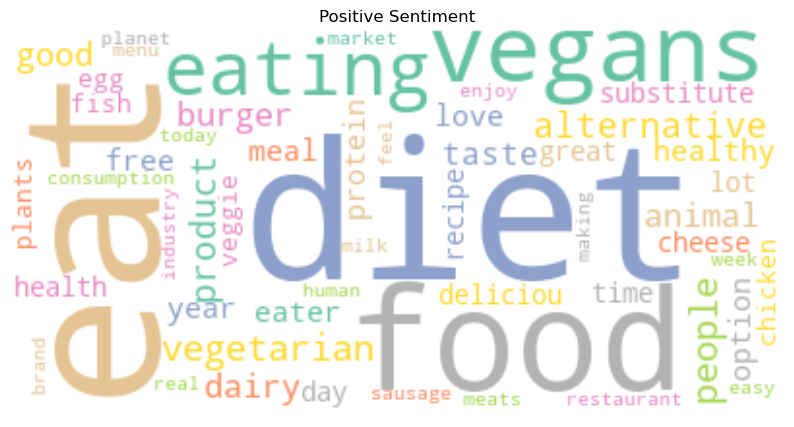

In [11]:
plt.figure(figsize = [10,10])
wc = WordCloud(background_color="white", min_font_size=10, max_font_size=100, colormap='Set2', stopwords = stopwrd)
#for i in range(len(df_topics_terms)): 
wordcloud = wc.generate(" ".join(df[df.sentiment_label == 'positive'].clean_text))

#plt.subplot(4, 3, i +1)
#plt.subplots_adjust(hspace=0.3)
plt.imshow(wordcloud, interpolation="bilinear", aspect="equal")
plt.axis("off")
plt.title('Positive Sentiment')
plt.savefig("positive_sentiment.png", format="png")
plt.show()



WordCloud on Neutral Sentiment 

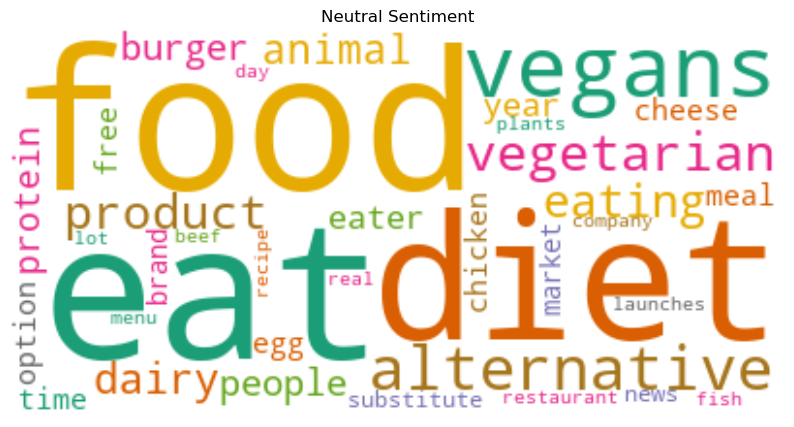

In [12]:
plt.figure(figsize = [10,10])
wc = WordCloud(background_color="white", min_font_size=10, max_font_size=100, colormap='Dark2', stopwords = stopwrd)
#for i in range(len(df_topics_terms)): 
wordcloud = wc.generate(" ".join(df[df.sentiment_label == 'neutral'].clean_text))

#plt.subplot(4, 3, i +1)
#plt.subplots_adjust(hspace=0.3)
plt.imshow(wordcloud, interpolation="bilinear", aspect="equal")
plt.axis("off")
plt.title('Neutral Sentiment')
plt.savefig("neutral_sentiment.png", format="png")
plt.show()

WordCloud on Negative Sentiment 

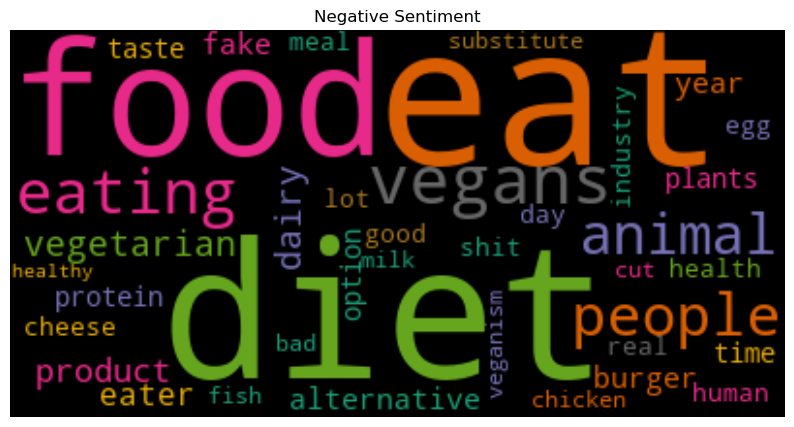

In [13]:
plt.figure(figsize = [10,10])
wc = WordCloud(background_color="black", min_font_size=10, max_font_size=100, colormap='Dark2', stopwords = stopwrd)
#for i in range(len(df_topics_terms)): 
wordcloud = wc.generate(" ".join(df[df.sentiment_label == 'negative'].clean_text))

#plt.subplot(4, 3, i +1)
#plt.subplots_adjust(hspace=0.3)
plt.imshow(wordcloud, interpolation="bilinear", aspect="equal")
plt.axis("off")
plt.title('Negative Sentiment')
plt.savefig("negative_sentiment.png", format="png")
plt.show()



WordCloud on Positive Sentiment w/ edited stopwords

In [15]:
edited_stopwrd = stopwrd
edited_stopwrd.extend(['food', 'eat', 'vegans', 'diet'])

print(len(edited_stopwrd))

1044


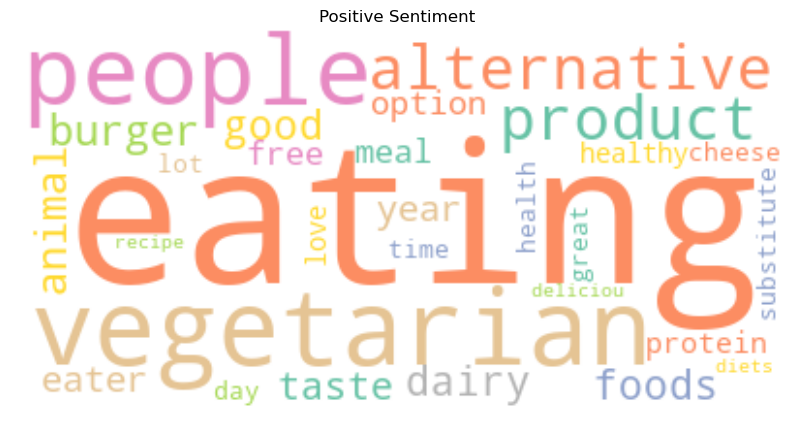

In [16]:
plt.figure(figsize = [10,10])
wc = WordCloud(background_color="white", min_font_size=10, max_font_size=100, colormap='Set2', stopwords = edited_stopwrd)
#for i in range(len(df_topics_terms)): 
wordcloud = wc.generate(" ".join(df[df.sentiment_label == 'positive'].clean_text))

#plt.subplot(4, 3, i +1)
#plt.subplots_adjust(hspace=0.3)
plt.imshow(wordcloud, interpolation="bilinear", aspect="equal")
plt.axis("off")
plt.title('Positive Sentiment')
plt.savefig("positive_sentiment_edited.png", format="png")
plt.show()


WordCloud on Neutral Sentiment w/ edited stopwords

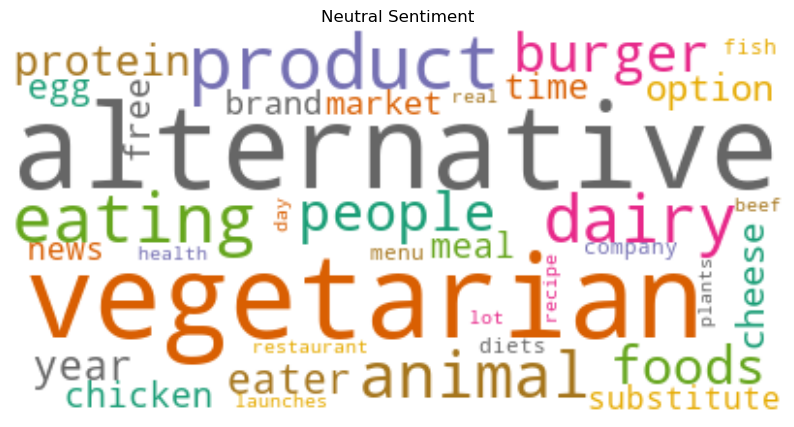

In [17]:
plt.figure(figsize = [10,10])
wc = WordCloud(background_color="white", min_font_size=10, max_font_size=100, colormap='Dark2', stopwords = stopwrd)
#for i in range(len(df_topics_terms)): 
wordcloud = wc.generate(" ".join(df[df.sentiment_label == 'neutral'].clean_text))

#plt.subplot(4, 3, i +1)
#plt.subplots_adjust(hspace=0.3)
plt.imshow(wordcloud, interpolation="bilinear", aspect="equal")
plt.axis("off")
plt.title('Neutral Sentiment')
plt.savefig("neutral_sentiment_edited.png", format="png")
plt.show()

WordCloud on Negative Sentiment w/ edited stopwords

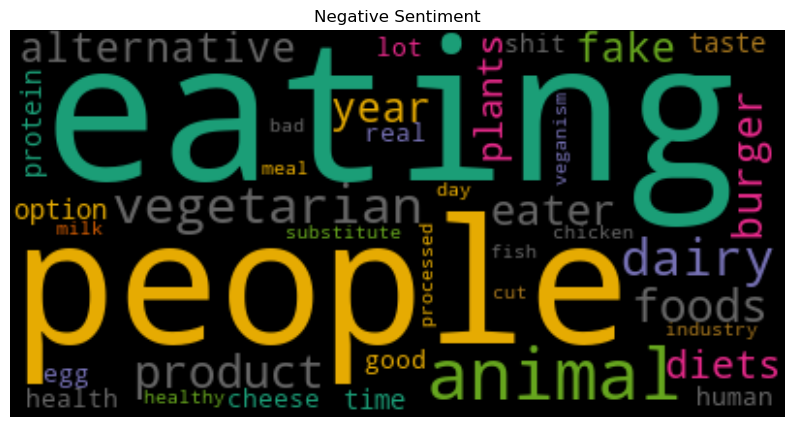

In [18]:
plt.figure(figsize = [10,10])
wc = WordCloud(background_color="black", min_font_size=10, max_font_size=100, colormap='Dark2', stopwords = edited_stopwrd)
#for i in range(len(df_topics_terms)): 
wordcloud = wc.generate(" ".join(df[df.sentiment_label == 'negative'].clean_text))

#plt.subplot(4, 3, i +1)
#plt.subplots_adjust(hspace=0.3)
plt.imshow(wordcloud, interpolation="bilinear", aspect="equal")
plt.axis("off")
plt.title('Negative Sentiment')
plt.savefig("negative_sentiment_edited.png", format="png")
plt.show()



Which Tweets associate to highest negative sentiment score vs highest positive sentiment score 

In [19]:
pd.set_option('max_colwidth', 800)


In [20]:
positive_df = df[df['sentiment_label'] == 'positive']


top_positive_score = positive_df[positive_df['sentiment_score']==positive_df['sentiment_score'].max()]


top_positive_score

,datetime,url,content,username,like_count,clean_text,clean_text_lem,Healthy Diet,Fake Food,Brand Deal,...,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title,topic_term,ym_date,sentiment_score,sentiment_label
2,2020-01-01 00:31:12+00:00,https://twitter.com/plantpowercoupl/status/1212169364771950593,What?!?!?!?!?!?!?\n\nFYI - this is one of those people who say plant-based dieters also eat meat sometimes b/c that's what they've devolved it to to make themselves feel better.\n\n#plantbased #Vegan,plantpowercoupl,3,what fyi this is one of those people who say plant based dieters also eat meat sometimes b c that s what they ve devolved it to to make themselves feel better,what fyi this is one of those people who say plant based dieter also eat meat sometimes b c that s what they ve devolved it to to make themselves feel better,0.020,0.002,0.000,...,0.000,0.000,0.000,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01,0.8206,positive
3,2020-01-01 00:31:33+00:00,https://twitter.com/FurForceFive/status/1212169452860522496,Reducing your meat &amp; dairy intake can help mitigate climate change. \nA plant-based diet can also reduce inflammation in the body. It sent my RA into remission when meds stopped working.\n#Vegan #Climate #Health🌱\n\nThe Meat-Lover’s Guide to Eating Less Meat https://t.co/u6xtvNWOPj,FurForceFive,1,reducing your meat amp dairy intake can help mitigate climate change a plant based diet can also reduce inflammation in the body it sent my ra into remission when meds stopped working the meat lover’s guide to eating less meat,reducing your meat amp dairy intake can help mitigate climate change a plant based diet can also reduce inflammation in the body it sent my ra into remission when med stopped working the meat lover’s guide to eating le meat,0.002,0.001,0.000,...,0.007,0.000,0.000,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01,0.2023,positive
4,2020-01-01 01:32:27+00:00,https://twitter.com/CatMumof4/status/1212184780659396608,"@KFC_UKI What plant based products will be used? I'm hoping for Jackfruit, if its cooked right it tastes delicious. 😍 \nAs long as it's prepared and cooked in seperate cooking areas and not shared equip with meat products then we will give it a go. Also please introduce vegan mayo sachets",CatMumof4,0,what plant based products will be used i m hoping for jackfruit if its cooked right it tastes delicious as long as it s prepared and cooked in seperate cooking areas and not shared equip with meat products then we will give it a go also please introduce vegan mayo sachets,what plant based product will be used i m hoping for jackfruit if it cooked right it taste delicious a long a it s prepared and cooked in seperate cooking area and not shared equip with meat product then we will give it a go also please introduce vegan mayo sachet,0.001,0.003,0.000,...,0.006,0.000,0.003,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01,0.8925,positive
6,2020-01-01 02:02:23+00:00,https://twitter.com/plantpowercoupl/status/1212192312060731392,"@Grateful_Gabb I am not attacking plant-based people nor am I saying that plant-based people are claiming to be #vegan... nor should they. I'm saying ""plant-based"" people that eat me are not plant-based at all. Because, meat.\n\nYou keep trying to make it seem like I'm saying something I'm not.",plantpowercoupl,1,i am not attacking plant based people nor am i saying that plant based people are claiming to be nor should they i m saying plant based people that eat me are not plant based at all because meat you keep trying to make it seem like i m saying something i m not,i am not attacking plant based people nor am i saying that plant based people are cl

In [22]:
negative_df = df[df['sentiment_label'] == 'negative']
top_negative_score = negative_df[negative_df['sentiment_score']==negative_df['sentiment_score'].min()]


top_negative_score

,datetime,url,content,username,like_count,clean_text,clean_text_lem,Healthy Diet,Fake Food,Brand Deal,...,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title,topic_term,ym_date,sentiment_score,sentiment_label
0,2020-01-01 00:00:43+00:00,https://twitter.com/helloamygarner/status/1212161696296517632,"I stopped being a meat-loving disaster in the kitchen – and went plant-based in 5 steps, without turning into a crazed evangelical lunatic!\n\nOne of the podcasts that really helps me is the Rich Roll podcast: https://t.co/4OxLD4eYaB\n\n#vegan #richroll https://t.co/ESJxf8I4WM",helloamygarner,0,i stopped being a meat loving disaster in the kitchen – and went plant based in steps without turning into a crazed evangelical lunatic one of the podcasts that really helps me is the rich roll podcast,i stopped being a meat loving disaster in the kitchen – and went plant based in step without turning into a crazed evangelical lunatic one of the podcasts that really help me is the rich roll podcast,0.000,0.000,0.001,...,0.000,0.000,0.001,0.003,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01,-0.5422,negative
5,2020-01-01 02:01:20+00:00,https://twitter.com/important_89/status/1212192047500689408,Absolutely. Going plant based/vegan is the morally correct (and healthiest) thing to do. We don't need to eat meat and doing so damages our health and the animals and planet. Read the #chinastudy,important_89,0,absolutely going plant based vegan is the morally correct and healthiest thing to do we don t need to eat meat and doing so damages our health and the animals and planet read the,absolutely going plant based vegan is the morally correct and healthiest thing to do we don t need to eat meat and doing so damage our health and the animal and planet read the,0.007,0.002,0.000,...,0.002,0.000,0.000,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01,-0.5777,negative
7,2020-01-01 02:33:42+00:00,https://twitter.com/plantpowercoupl/status/1212200193917108224,Things I learned in the last few days of 2019\n(a tweet of disbelief &amp; sarcasm):\n\n- pescavegan is trying to become a thing\n\n- people eating meat somehow still call themselves plant-based\n\n- most #carnists will believe any lie said about #vegans and/or #veganism,plantpowercoupl,10,things i learned in the last few days of a tweet of disbelief amp sarcasm pescavegan is trying to become a thing people eating meat somehow still call themselves plant based most will believe any lie said about and or,thing i learned in the last few day of a tweet of disbelief amp sarcasm pescavegan is trying to become a thing people eating meat somehow still call themselves plant based most will believe any lie said about and or,0.006,0.001,0.000,...,0.001,0.000,0.002,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01,-0.2263,negative
9,2020-01-01 02:49:23+00:00,https://twitter.com/plantpowercoupl/status/1212204141633769472,"@Grateful_Gabb @VeganTitties Correct: not all plant-based people are vegan, but no one who eats meat (any %) is plant-based.",plantpowercoupl,6,correct not all plant based people are vegan but no one who eats meat any is plant based,correct not all plant based people are vegan but no one who eats meat any is plant based,0.000,0.000,0.000,...,0.011,0.000,0.002,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01,-0.5267,negative
10,2020-01-01 03:06:57+00:00,https://twitter.com/plantpowercoupl/status/1212208563378118657,"@Herofthewords @THATherbivore Direct quote from tonight ( but I don't know how to put -""embed""? - tweets in responses.)\n\n""Plant based doesn’t exclude meat necessarily

In [24]:
neutral_df = df[(df.sentiment_score < 0.05) & (df.sentiment_score > -0.05)]
top_neutral_score = neutral_df[neutral_df['sentiment_score']==neutral_df['sentiment_score'].max()]
top_neutral_score

,datetime,url,content,username,like_count,clean_text,clean_text_lem,Healthy Diet,Fake Food,Brand Deal,...,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title,topic_term,ym_date,sentiment_score,sentiment_label
1,2020-01-01 00:04:29+00:00,https://twitter.com/Taertebjerg/status/1212162642535763973,Arnold Schwarzenegger has ditched meat and dairy to focus on plant-based eating | Totally Vegan Buzz https://t.co/R8dn9lJMQi,Taertebjerg,0,arnold schwarzenegger has ditched meat and dairy to focus on plant based eating totally vegan buzz,arnold schwarzenegger ha ditched meat and dairy to focus on plant based eating totally vegan buzz,0.007,0.003,0.0,...,0.000,0.000,0.000,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01,0.0000,neutral
22,2020-01-01 14:00:41+00:00,https://twitter.com/SurvivalResorcs/status/1212373077700550665,The Meat-Lover’s Guide to Eating Less Meat https://t.co/5d9dFYYXIB #food #plantbased #climatechange #meat #dairy #vegan #cooking #happynewyear2020 #HappyNewYear #NewYear #NewYears2020,SurvivalResorcs,0,the meat lover’s guide to eating less meat,the meat lover’s guide to eating le meat,0.000,0.005,0.0,...,0.003,0.000,0.008,0.001,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01,0.0000,neutral
26,2020-01-01 15:44:26+00:00,https://twitter.com/HappyEcoNews/status/1212399186735316993,"Plant-based meat takes center stage at Kroger - © PBFA Vegan burgers, sausage, deli slices, roasts, seitan, and even jackfruit are moving to the meat department for a trial run... - https://t.co/y9SVkVsyzI - - https://t.co/CFiSLaOOjK",HappyEcoNews,1,plant based meat takes center stage at kroger pbfa vegan burgers sausage deli slices roasts seitan and even jackfruit are moving to the meat department for a trial run,plant based meat take center stage at kroger pbfa vegan burger sausage deli slice roast seitan and even jackfruit are moving to the meat department for a trial run,0.024,0.000,0.0,...,0.000,0.001,0.004,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01,0.0000,neutral
27,2020-01-01 15:45:28+00:00,https://twitter.com/therealNotMilk/status/1212399449558913025,"#Milk #Vegan #PlantBased Comparing 100 gram portions of various foods of methionine levels in people eat: apple = .001 gms, tofu (silken firm) = 0.20 gms, hard-boiled egg = 0.39 gms, cheddar cheese = 0.78 gms, lean beef = 1.10 gms, chicken (white meat) = 1.25 gms",therealNotMilk,2,comparing gram portions of various foods of methionine levels in people eat apple gms tofu silken firm gms hard boiled egg gms cheddar cheese gms lean beef gms chicken white meat gms,comparing gram portion of various food of methionine level in people eat apple gm tofu silken firm gm hard boiled egg gm cheddar cheese gm lean beef gm chicken white meat gm,0.000,0.000,0.0,...,0.002,0.005,0.000,0.008,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01,0.0000,neutral
28,2020-01-01 15:46:28+00:00,https://twitter.com/hargrump/status/1212399700277633024,@KemMinnick @JamesHy55357179 @ForTkdi @RenSpidell @VeganRecovering @Veganella_ @SebastienneL @tweetprix @mmooch17 @me1stVegan2nd @marisa1sonly @VeganRoo @BedrosGesaratsi @ukmav @jadeo09 @GeimerNicholas @FabsPasses @ihblythe @ShortnBluntTho @VeganSuperBitch @frsucks @VMythDestroyer @forestwinkle @GenBrandX @Jay_SPQR @Extremely_Vegan @fudcrusher @RichardRavarino @SamHall38002871 @Dairy_is_scary @mrc314 @carnivore_drumr @craftyvegangirl @ProfTimNoakes @joshacapes @SBakerMD No anemia here on a plant based diet. 5 years animal products free. 28 years no meat. \n\n#gofigure,hargrump,4,no anemia here on a plant based diet years animal products free years no meat,n

Boxplot : Sentiment Analysis 

Text(0.5, 1.0, "Top Topic's from 2020 to 2022")

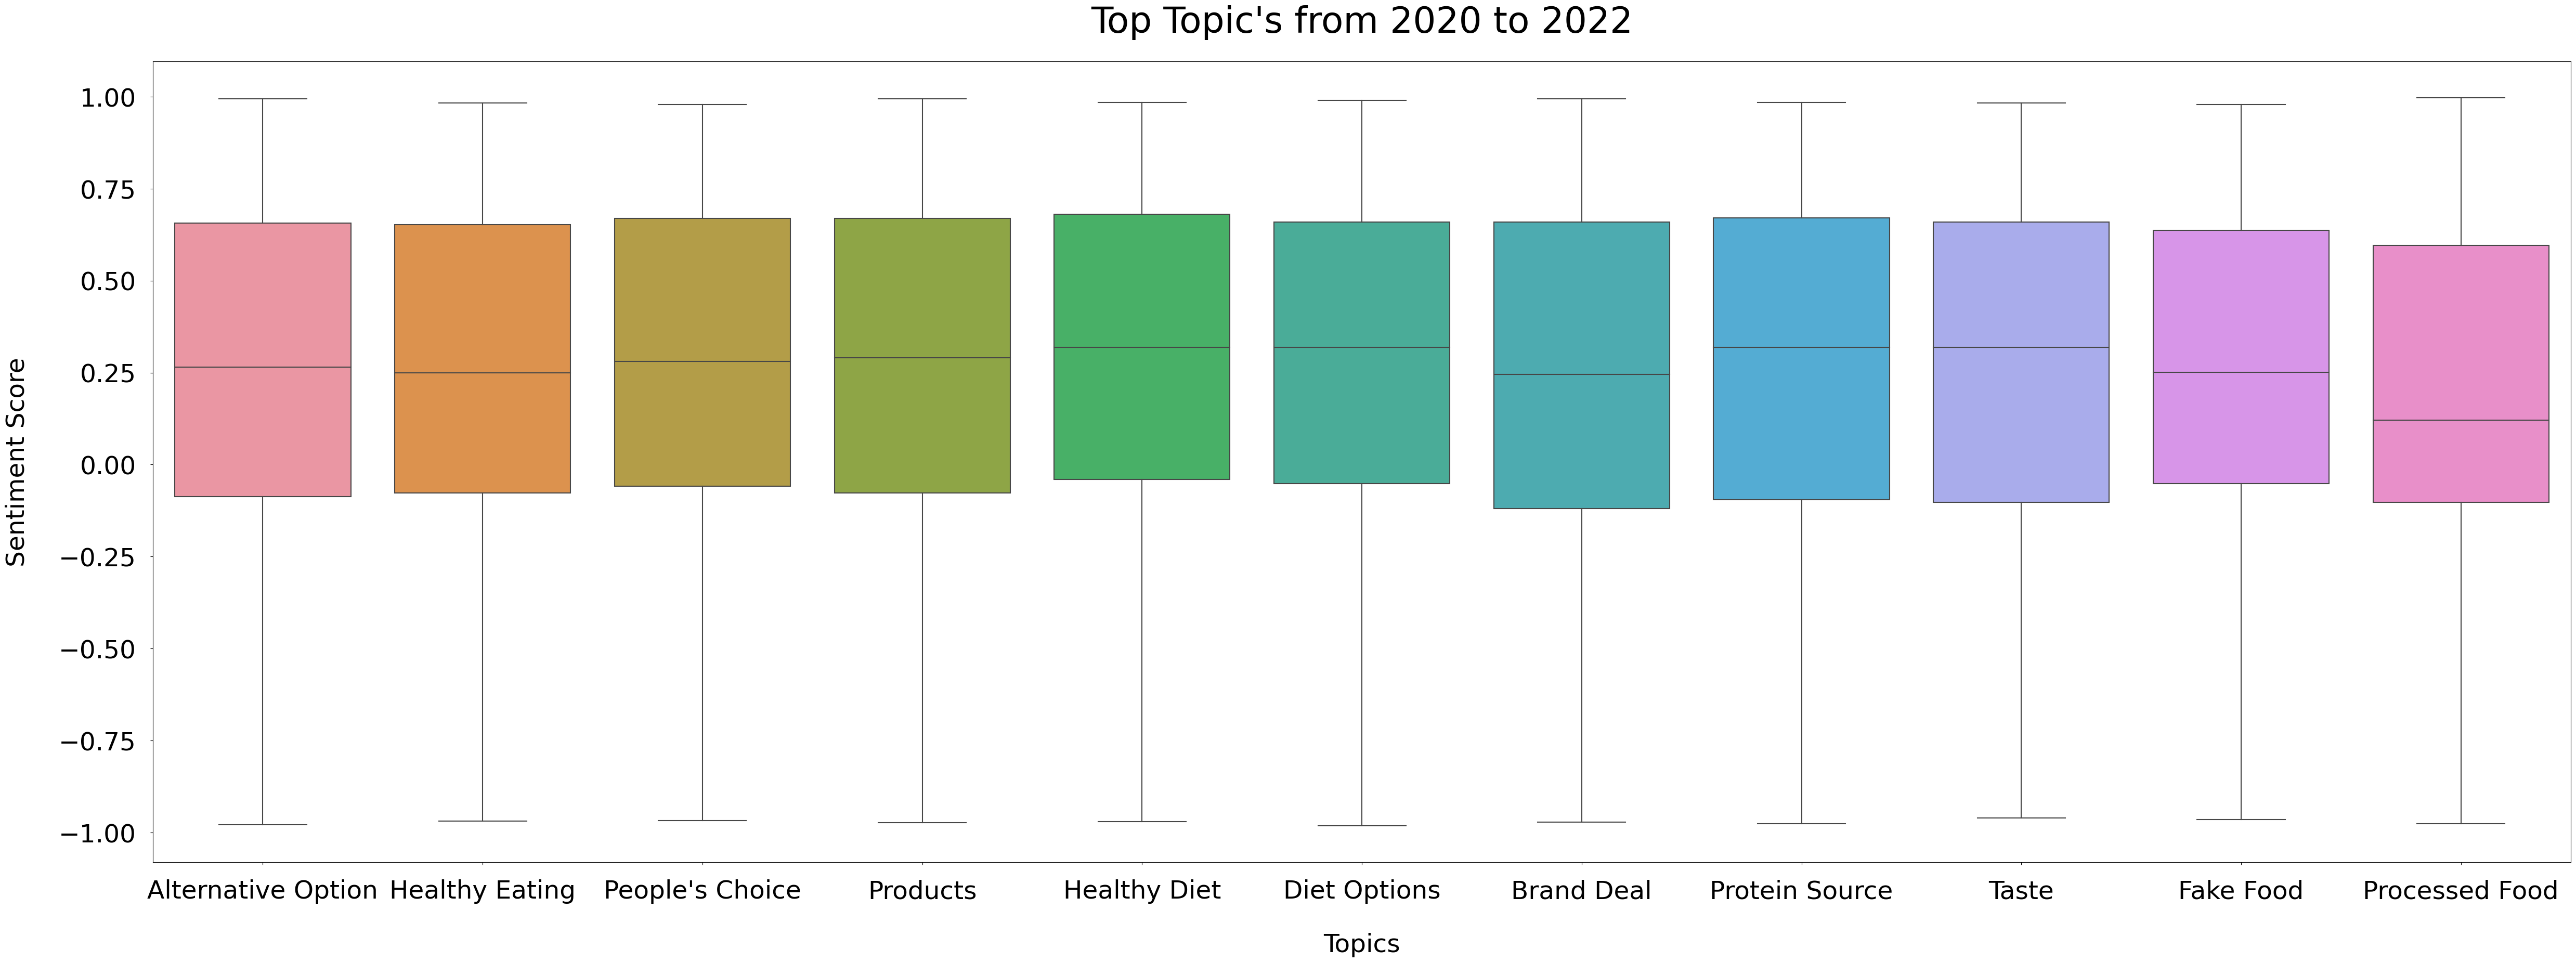

In [26]:
fig,ax = plt.subplots(figsize = (60,20))
sns.boxplot(data = df, x="topic_title", y="sentiment_score")
#plt.figure(figsize = (30,20))
ax.set_xlabel('Topics', fontsize=35, labelpad = 40)
ax.set_ylabel('Sentiment Score', fontsize=35, labelpad = 40)
ax.tick_params(axis='both', which='major', labelsize=35, pad = 20)

rcParams['axes.titlepad'] = 5 

plt.title("Top Topic's from 2020 to 2022", fontsize=50, pad = 40)



Check to see if Distribution is Normalize or Bimodal across all topics 

/var/folders/vl/msb_49ms6zn68_cx7zq3jx4w0000gn/T/ipykernel_960/1175101997.py:12: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('distribution_sentiment.png', bbox= 'tight')


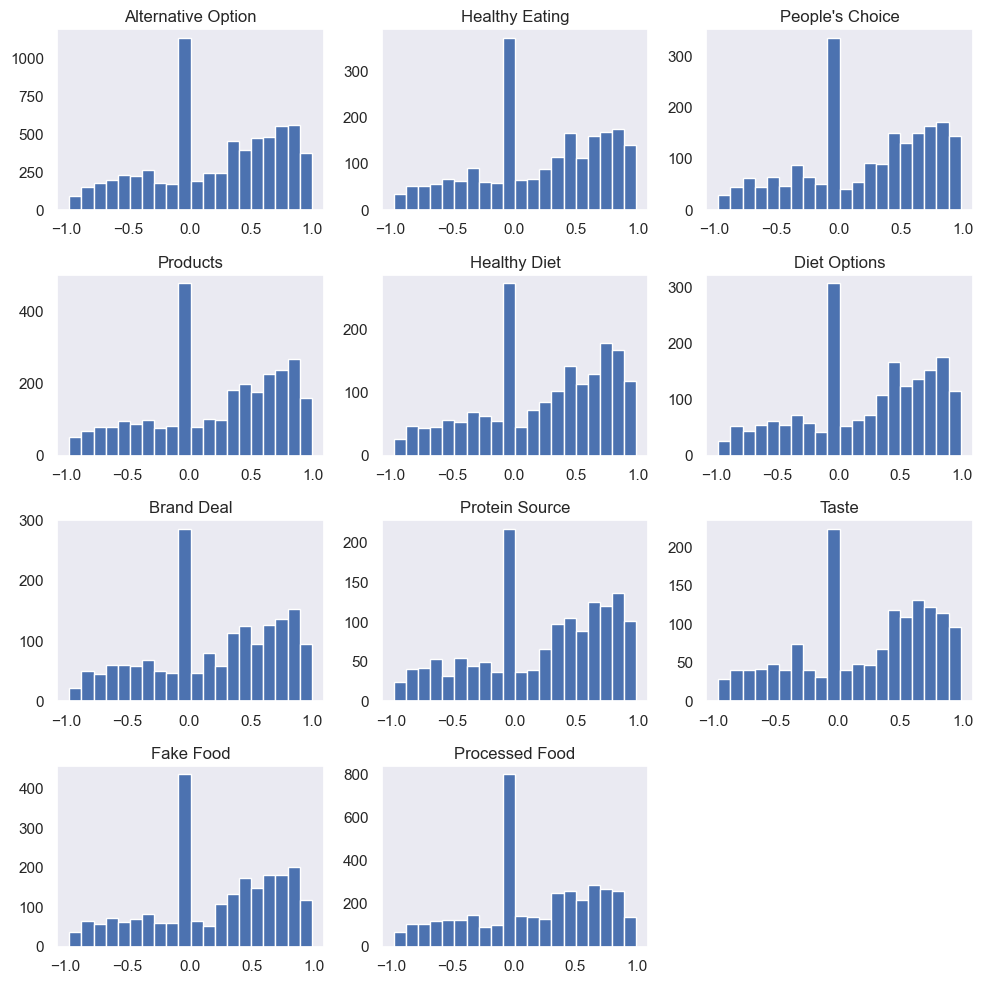

In [189]:
topics = ['Alternative Option', 'Healthy Eating', "People's Choice", 
         'Products', 'Healthy Diet', 'Diet Options', 'Brand Deal', 
         'Protein Source', 'Taste', 'Fake Food', 'Processed Food']
plt.figure(figsize = [10,10])
for index, item in enumerate(topics):
    plt.subplot(4,3,index +1)
    plt.subplots_adjust(hspace=0.3)
    plt.title(topics[index])
    filtered_df = (df[df.topic_title == item])
    plt.hist(filtered_df.sentiment_score, bins = 20)
    plt.tight_layout()
plt.savefig('distribution_sentiment.png', bbox= 'tight')    

Sentiment Across All Topics Overtime 

In [36]:
s  = df.groupby(['ym_date']).sentiment_score.mean()
s

ym_date
2020-01    0.207505
2020-02    0.187496
2020-03    0.216937
2020-04    0.198326
2020-05    0.211110
2020-06    0.207843
2020-07    0.225114
2020-08    0.183428
2020-09    0.239699
2020-10    0.201844
2020-11    0.230524
2020-12    0.220168
2021-01    0.246339
2021-02    0.213008
2021-03    0.210522
2021-04    0.224016
2021-05    0.231890
2021-06    0.218820
2021-07    0.207399
2021-08    0.217196
2021-09    0.213649
2021-10    0.180427
2021-11    0.209322
2021-12    0.203228
2022-01    0.240032
2022-02    0.234599
2022-03    0.191874
2022-04    0.196539
2022-05    0.197971
2022-06    0.179412
2022-07    0.152891
2022-08    0.167896
2022-09    0.137516
2022-10    0.182972
Name: sentiment_score, dtype: float64

In [75]:
df2 = df[df.topic_title == 'Alternative Option']
df2.ym_date.unique()

array(['2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06',
       '2020-07'], dtype=object)

In [37]:
sentiment_overtime = df.groupby(['ym_date', 'topic_title']).sentiment_score.mean().reset_index()
sentiment_overtime

,ym_date,topic_title,sentiment_score
0,2020-01,Alternative Option,0.207505
1,2020-02,Alternative Option,0.187496
2,2020-03,Alternative Option,0.216937
3,2020-04,Alternative Option,0.198326
4,2020-05,Alternative Option,0.211110
5,2020-06,Alternative Option,0.207843
6,2020-07,Alternative Option,0.235070
7,2020-07,Healthy Eating,0.196194
8,2020-08,Healthy Eating,0.183428
9,2020-09,Healthy Eating,0.239699


In [182]:
sentiment_overtime.ym_date = pd.to_datetime(sentiment_overtime.ym_date).dt.strftime('%m/%Y')
sentiment_overtime

,ym_date,topic_title,sentiment_score
0,01/2020,Alternative Option,0.207505
1,02/2020,Alternative Option,0.187496
2,03/2020,Alternative Option,0.216937
3,04/2020,Alternative Option,0.198326
4,05/2020,Alternative Option,0.211110
5,06/2020,Alternative Option,0.207843
6,07/2020,Alternative Option,0.235070
7,07/2020,Healthy Eating,0.196194
8,08/2020,Healthy Eating,0.183428
9,09/2020,Healthy Eating,0.239699


/var/folders/vl/msb_49ms6zn68_cx7zq3jx4w0000gn/T/ipykernel_960/201985928.py:18: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('sentiment_overtime.png', bbox = 'tight')


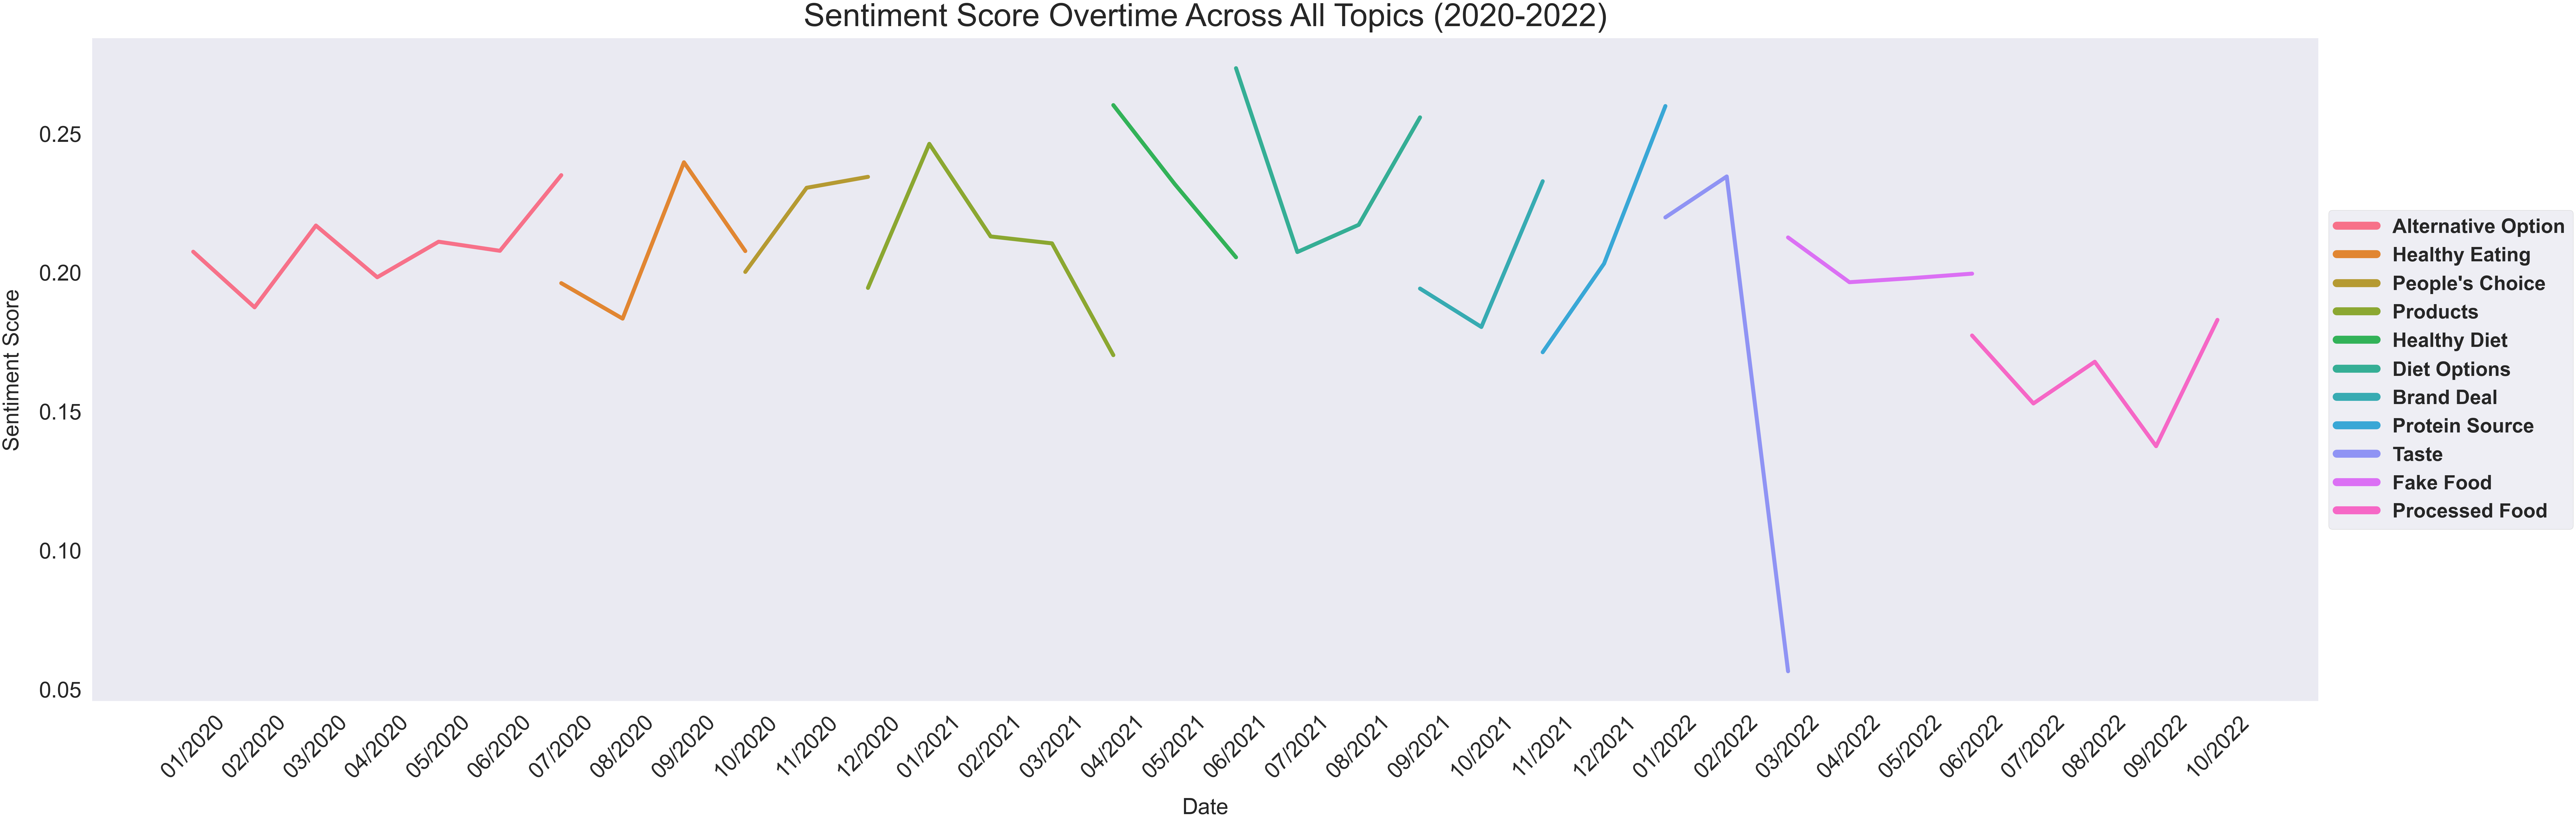

In [228]:
fig,ax = plt.subplots(figsize = (100,30))


sns.set_theme(style='dark')
sns.lineplot(x = 'ym_date', y = 'sentiment_score', hue = 'topic_title', data = sentiment_overtime, estimator=None,
    linewidth=10)
ax.set_xlabel('Date', fontsize=55, labelpad = 40)
ax.set_ylabel('Sentiment Score', fontsize=55, labelpad = 40)
ax.tick_params(axis='both', which='major', labelsize=55, pad = 20)
plt.xticks(rotation= 45)

plt.title('Sentiment Score Overtime Across All Topics (2020-2022)', fontsize = 80, pad = 30)

leg = plt.legend(prop={'size':50, 'weight':'bold'},loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 55)
for i in leg.legendHandles:
    i.set_linewidth(20)

plt.savefig('sentiment_overtime.png', bbox = 'tight')

In [180]:
sentiment_overtime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ym_date          44 non-null     object 
 1   topic_title      44 non-null     object 
 2   sentiment_score  44 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.2+ KB


In [181]:
sentiment_overtime.ym_date = pd.to_datetime(sentiment_overtime.ym_date).dt.strftime('%m/%Y')
sentiment_overtime

,ym_date,topic_title,sentiment_score
0,01/2020,Alternative Option,0.207505
1,02/2020,Alternative Option,0.187496
2,03/2020,Alternative Option,0.216937
3,04/2020,Alternative Option,0.198326
4,05/2020,Alternative Option,0.211110
5,06/2020,Alternative Option,0.207843
6,07/2020,Alternative Option,0.235070
7,07/2020,Healthy Eating,0.196194
8,08/2020,Healthy Eating,0.183428
9,09/2020,Healthy Eating,0.239699


In [195]:
taste_topic = sentiment_overtime[sentiment_overtime.topic_title == 'Taste']
taste_topic 

,ym_date,topic_title,sentiment_score
32,01/2022,Taste,0.219870
33,02/2022,Taste,0.234599
35,03/2022,Taste,0.056495


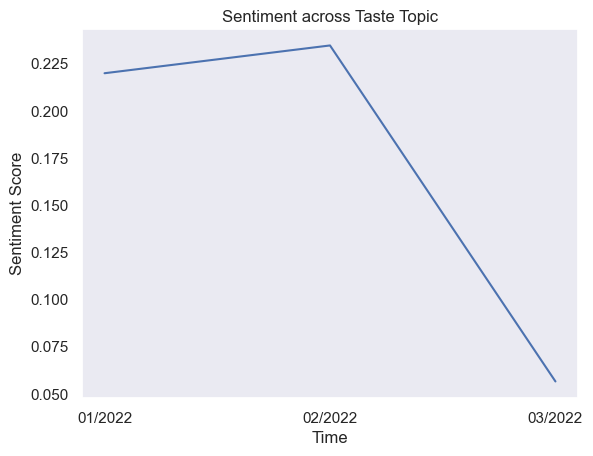

In [196]:
plt.xlabel('Time')
plt.ylabel('Sentiment Score')
plt.title('Sentiment across Taste Topic')
plt.plot(taste_topic.ym_date, taste_topic.sentiment_score)

In [197]:
taste_topic_df  = df[(df.topic_title == 'Taste') & (df.ym_date == '2022-03')]
taste_topic_df.sentiment_label.value_counts()

positive    48
negative    39
neutral     17
Name: sentiment_label, dtype: int64

In [202]:
taste_topic_df[taste_topic_df.sentiment_label == 'negative'].sort_values(by= 'sentiment_score', ascending = True)[:10]

,datetime,url,content,username,like_count,clean_text,clean_text_lem,Healthy Diet,Fake Food,Brand Deal,...,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title,topic_term,ym_date,sentiment_score,sentiment_label
22532,2022-03-01 16:31:04+00:00,https://twitter.com/elpaisinenglish/status/1498697338579206150,"New research has concluded that vegetarians and vegans, and even those who eat fish over red meat, have a lower risk of cancer. In the case of prostate cancer, there was a 20% reduction in risk among those with a plant-based diet https://t.co/2a1zPYhBqV",elpaisinenglish,4,new research has concluded that vegetarians and vegans and even those who eat fish over red meat have a lower risk of cancer in the case of prostate cancer there was a reduction in risk among those with a plant based diet,new research ha concluded that vegetarian and vegan and even those who eat fish over red meat have a lower risk of cancer in the case of prostate cancer there wa a reduction in risk among those with a plant based diet,0.000,0.067,0.000,...,0.001,0.089,0.000,0.000,8,Taste,"[taste, good, real, texture, substitute, smell, stuff, fake, reason, love, bacon, feel, enjoy, shit, beef]",2022-03,-0.9349,negative
22595,2022-03-03 16:54:13+00:00,https://twitter.com/MasonsHelmet/status/1499427939410059270,When I was vegan I HATED the plant based “meat” it was all disgusting.,MasonsHelmet,6,when i was vegan i hated the plant based “meat” it was all disgusting,when i wa vegan i hated the plant based “meat” it wa all disgusting,0.003,0.001,0.001,...,0.002,0.046,0.002,0.000,8,Taste,"[taste, good, real, texture, substitute, smell, stuff, fake, reason, love, bacon, feel, enjoy, shit, beef]",2022-03,-0.8531,negative
22551,2022-03-02 10:01:38+00:00,https://twitter.com/truthswarm/status/1498961723604279296,@danbondissafe @finnebrogue Poor excuse for shitty English tbh.\n\nSo you knew the answer was that the original tweet contained chicken (note there is no such thing as a plant based chicken. Either it's chicken and it's meat or it's not chicken) and not the box but decided to be a smelly vegan wanker instead.,truthswarm,0,poor excuse for shitty english tbh so you knew the answer was that the original tweet contained chicken note there is no such thing as a plant based chicken either it s chicken and it s meat or it s not chicken and not the box but decided to be a smelly vegan wanker instead,poor excuse for shitty english tbh so you knew the answer wa that the original tweet contained chicken note there is no such thing a a plant based chicken either it s chicken and it s meat or it s not chicken and not the box but decided to be a smelly vegan wanker instead,0.001,0.000,0.052,...,0.018,0.053,0.001,0.000,8,Taste,"[taste, good, real, texture, substitute, smell, stuff, fake, reason, love, bacon, feel, enjoy, shit, beef]",2022-03,-0.8360,negative
22609,2022-03-04 05:00:14+00:00,https://twitter.com/Kat73737/status/1499610646693826566,@Judith54Nunn @sallymcmanus I don’t eat red meat Bc it’s cruel and unnecessary. Bad for the planet and bad for human health. Look up vegan recipes Judith. So many other cheap and yummy options for plant based protein replacement 👍,Kat73737,0,i don’t eat red meat bc it’s cruel and unnecessary bad for the planet and bad for human health look up vegan recipes judith so many other cheap and yummy options for plant based protein replacement,i don’t eat red meat bc it’s cruel and unnecessary bad for the planet and bad for human health look up vegan recipe judith so many other cheap and yummy option for plant based protein replacement,0.000,0.089,0.100,...,0.000,0.135,0.000,0.000,8,Taste,"[taste, good, real, texture, substitute, smell, stuff, fake, reason, love, bacon, feel, enjoy, shit, beef]",2022-03,-0.8126,negative
22617,2022-03-04 12:55:49+00:00,https://twitter.com/HeydonEmily/status/1499730330344853507,"“my disabilities prevent me from going 100% plant-based” is not a good reason to not consume *other* animal pro

In [199]:
taste_topic_negative = taste_topic_df[taste_topic_df['sentiment_score']==taste_topic_df['sentiment_score'].min()]
taste_topic_negative

,datetime,url,content,username,like_count,clean_text,clean_text_lem,Healthy Diet,Fake Food,Brand Deal,...,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title,topic_term,ym_date,sentiment_score,sentiment_label
22532,2022-03-01 16:31:04+00:00,https://twitter.com/elpaisinenglish/status/1498697338579206150,"New research has concluded that vegetarians and vegans, and even those who eat fish over red meat, have a lower risk of cancer. In the case of prostate cancer, there was a 20% reduction in risk among those with a plant-based diet https://t.co/2a1zPYhBqV",elpaisinenglish,4,new research has concluded that vegetarians and vegans and even those who eat fish over red meat have a lower risk of cancer in the case of prostate cancer there was a reduction in risk among those with a plant based diet,new research ha concluded that vegetarian and vegan and even those who eat fish over red meat have a lower risk of cancer in the case of prostate cancer there wa a reduction in risk among those with a plant based diet,0.0,0.067,0.0,...,0.001,0.089,0.0,0.0,8,Taste,"[taste, good, real, texture, substitute, smell, stuff, fake, reason, love, bacon, feel, enjoy, shit, beef]",2022-03,-0.9349,negative


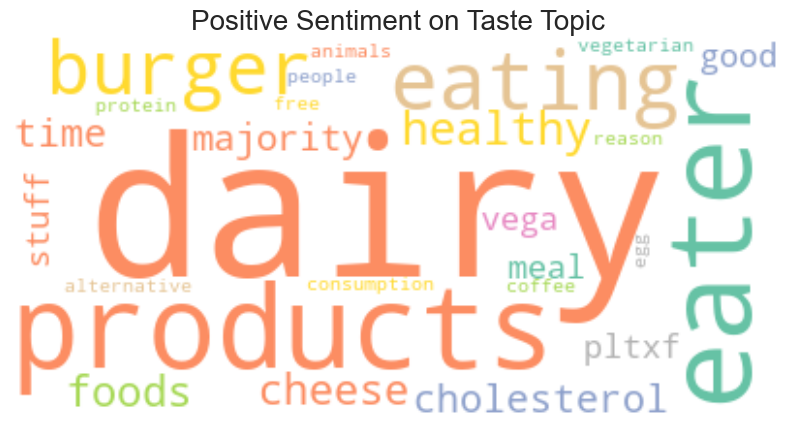

In [208]:
plt.figure(figsize = [10,10])
wc = WordCloud(background_color="white", min_font_size=10, max_font_size=100, colormap='Set2', stopwords = edited_stopwrd)
#for i in range(len(df_topics_terms)): 
wordcloud = wc.generate(" ".join(taste_topic_df[taste_topic_df.sentiment_label == 'positive'].clean_text))

#plt.subplot(4, 3, i +1)
#plt.subplots_adjust(hspace=0.3)
plt.imshow(wordcloud, interpolation="bilinear", aspect="equal")
plt.axis("off")
plt.title('Positive Sentiment on Taste Topic', fontsize= 20)
plt.savefig("taste_sentiment_pos_.png", format="png")
plt.show()


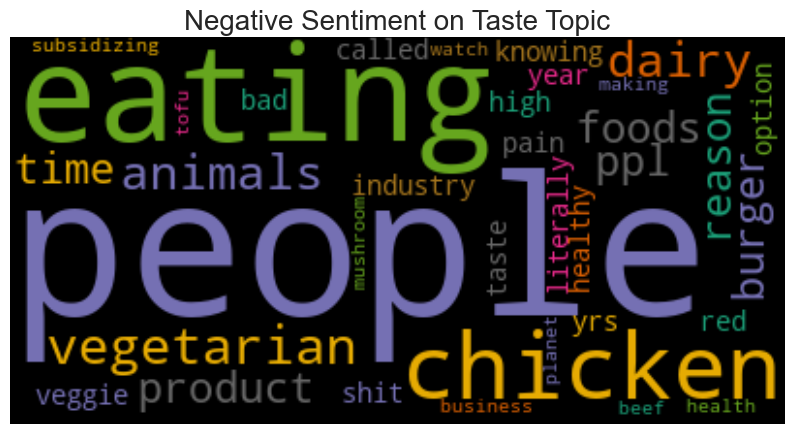

In [209]:
plt.figure(figsize = [10,10])
wc = WordCloud(background_color="black", min_font_size=10, max_font_size=100, colormap='Dark2', stopwords = edited_stopwrd)
#for i in range(len(df_topics_terms)): 
wordcloud = wc.generate(" ".join(taste_topic_df[taste_topic_df.sentiment_label == 'negative'].clean_text))

#plt.subplot(4, 3, i +1)
#plt.subplots_adjust(hspace=0.3)
plt.imshow(wordcloud, interpolation="bilinear", aspect="equal")
plt.axis("off")
plt.title('Negative Sentiment on Taste Topic', fontsize = 20)
plt.savefig("taste_sentiment_neg.png", format="png")
plt.show()



Investigate on Beyond Meat keyword under Brand Deal Topic

In [142]:
brand_d_beyond = df[df.clean_text_lem.str.contains('beyond meat') & (df.topic_title == 'Brand Deal')].reset_index()
brand_d_beyond

,index,datetime,url,content,username,like_count,clean_text,clean_text_lem,Healthy Diet,Fake Food,...,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title,topic_term,ym_date,sentiment_score,sentiment_label
0,17877,2021-09-12 17:40:28+00:00,https://twitter.com/CFL68/status/1437108865158500354,"@tmishmck I have been eating plant based for ~5 years. That being said, I still eat 'meat' 2-3 times/week. Many vegan faux meats are available. Beyond meat sausage, impossible burgers, and morningstar chicken strips, etc.",CFL68,2,i have been eating plant based for years that being said i still eat meat times week many vegan faux meats are available beyond meat sausage impossible burgers and morningstar chicken strips etc,i have been eating plant based for year that being said i still eat meat time week many vegan faux meat are available beyond meat sausage impossible burger and morningstar chicken strip etc,0.000,0.000,...,0.000,0.000,0.000,0.000,2,Brand Deal,"[burger, king, cooked, grill, impossible, patty, whopper, veggie, sausage, beef, suitable, chicken, cook, mcdonald, nugget]",2021-09,0.0000,neutral
1,17886,2021-09-13 07:24:33+00:00,https://twitter.com/fdiforum/status/1437316252817518593,McDonald’s to launch vegan McPlant burger in UK &amp; Ireland: McDonald’s UK&amp;I is set to trial its first ever plant-based burger – the McPlant – comprising a vegan patty co-developed with Beyond Meat. The company has spent three years on research and… https://t.co/SfuRStAdZJ https://t.co/mSljA5cCj1,fdiforum,1,mcdonald’s to launch vegan mcplant burger in uk amp ireland mcdonald’s uk amp i is set to trial its first ever plant based burger – the mcplant – comprising a vegan patty co developed with beyond meat the company has spent three years on research and…,mcdonald’s to launch vegan mcplant burger in uk amp ireland mcdonald’s uk amp i is set to trial it first ever plant based burger – the mcplant – comprising a vegan patty co developed with beyond meat the company ha spent three year on research and…,0.000,0.000,...,0.057,0.000,0.000,0.000,2,Brand Deal,"[burger, king, cooked, grill, impossible, patty, whopper, veggie, sausage, beef, suitable, chicken, cook, mcdonald, nugget]",2021-09,0.0000,neutral
2,17888,2021-09-13 10:22:35+00:00,https://twitter.com/ParadeBrands/status/1437361058298146826,McDonald’s UK&amp;I has announced a trial for its first ever plant-based burger – the McPlant. The fast food chain has spent three years on R&amp;D of the plant-based patty co-developed with Beyond Meat. #Sustainability #Vegan #Vegetarian #ClimateAction \nhttps://t.co/PaF97YKCan,ParadeBrands,1,mcdonald’s uk amp i has announced a trial for its first ever plant based burger – the mcplant the fast food chain has spent three years on r amp d of the plant based patty co developed with beyond meat,mcdonald’s uk amp i ha announced a trial for it first ever plant based burger – the mcplant the fast food chain ha spent three year on r amp d of the plant based patty co developed with beyond meat,0.000,0.000,...,0.041,0.000,0.000,0.000,2,Brand Deal,"[burger, king, cooked, grill, impossible, patty, whopper, veggie, sausage, beef, suitable, chicken, cook, mcdonald, nugget]",2021-09,0.0000,neutral
3,17928,2021-09-14 18:05:35+00:00,https://twitter.com/G7WJW/status/1437839962683084804,"@hovisbakery @BeyondMeat Damn that was a great burger if I do say so myself! Hovis premium burger bun, two Beyond Meat patties, a slice of M&amp;S plant based cheese, Heinz vegan mayo, Heinz vegan baconasie sauce, Richmond vegan bacon, lettuce and tomato. Just what I needed 😁 https://t.co/eBM3cbe8cf",G7WJW,9,damn that was a great burger if i do say so myself hovis premium burger bun two beyond meat patties a slice of m amp s plant based cheese heinz vegan mayo heinz vegan baconasie sauce richmond vegan bacon lettuce and tomato just what i needed,damn that wa a great burger if i do say so myself hovis premium burger bun two beyond meat patty a slice of m amp s plant base

In [143]:
brand_d_beyond.sentiment_label.value_counts()

positive    32
neutral     17
negative    13
Name: sentiment_label, dtype: int64

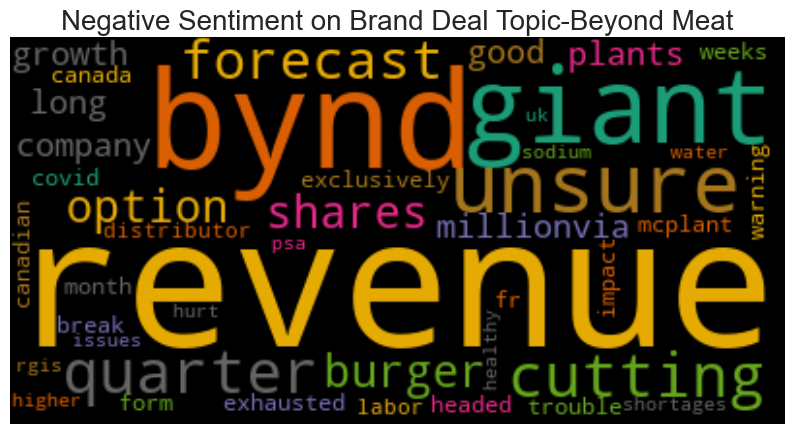

In [210]:
#negative wordcloud
plt.figure(figsize = [10,10])
wc = WordCloud(background_color="black", min_font_size=10, max_font_size=100, colormap='Dark2', stopwords = stopwrd)
#for i in range(len(df_topics_terms)): 
wordcloud = wc.generate(" ".join(brand_d_beyond[brand_d_beyond.sentiment_label == 'negative'].clean_text))

#plt.subplot(4, 3, i +1)
#plt.subplots_adjust(hspace=0.3)
plt.imshow(wordcloud, interpolation="bilinear", aspect="equal")
plt.axis("off")
plt.title('Negative Sentiment on Brand Deal Topic-Beyond Meat', fontsize = 20)
plt.savefig("negative_sentiment_brand_deal_beyond.png", format="png")
plt.show()


In [190]:
brand_d_neg = brand_d_beyond[brand_d_beyond['sentiment_score']==brand_d_beyond['sentiment_score'].min()]
brand_d_neg

,index,datetime,url,content,username,like_count,clean_text,clean_text_lem,Healthy Diet,Fake Food,...,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title,topic_term,ym_date,sentiment_score,sentiment_label
39,18926,2021-10-24 19:25:00+00:00,https://twitter.com/Alpha_Bronze/status/1452355462029058066,"Beyond Meat shares headed toward 17-month low after revenue warning! It said COVID impact, trouble with a Canadian distributor, labor shortages and water issues hurt revenue in Q3! $BYND #vegan #plantbased \nhttps://t.co/NOZxxdvosJ",Alpha_Bronze,1,beyond meat shares headed toward month low after revenue warning it said covid impact trouble with a canadian distributor labor shortages and water issues hurt revenue in q bynd,beyond meat share headed toward month low after revenue warning it said covid impact trouble with a canadian distributor labor shortage and water issue hurt revenue in q bynd,0.0,0.0,...,0.0,0.086,0.0,0.0,2,Brand Deal,"[burger, king, cooked, grill, impossible, patty, whopper, veggie, sausage, beef, suitable, chicken, cook, mcdonald, nugget]",2021-10,-0.8619,negative


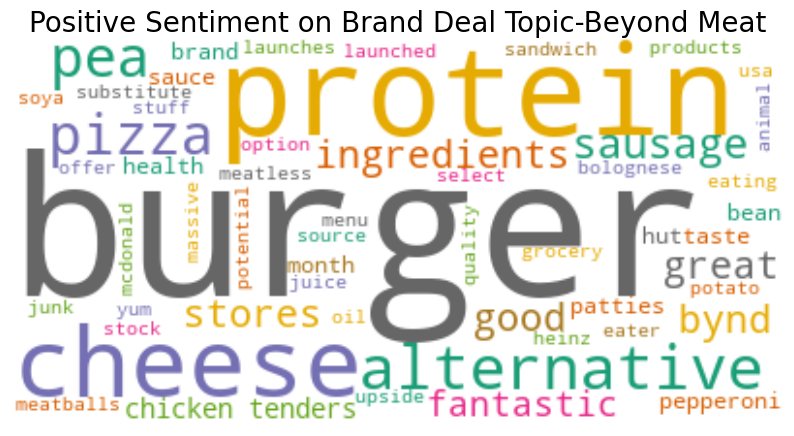

In [149]:
#positive wordcloud
plt.figure(figsize = [10,10])
wc = WordCloud(background_color="white", min_font_size=10, max_font_size=100, colormap='Dark2', stopwords = stopwrd)
#for i in range(len(df_topics_terms)): 
wordcloud = wc.generate(" ".join(brand_d_beyond[brand_d_beyond.sentiment_label == 'positive'].clean_text))

#plt.subplot(4, 3, i +1)
#plt.subplots_adjust(hspace=0.3)
plt.imshow(wordcloud, interpolation="bilinear", aspect="equal")
plt.axis("off")
plt.title('Positive Sentiment on Brand Deal Topic-Beyond Meat', fontsize = 20)
plt.savefig("positive_sentiment_brand_deal_beyond.png", format="png")
plt.show()

In [191]:
brand_d_pos = brand_d_beyond[brand_d_beyond['sentiment_score']==brand_d_beyond['sentiment_score'].max()]
brand_d_pos

,index,datetime,url,content,username,like_count,clean_text,clean_text_lem,Healthy Diet,Fake Food,...,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title,topic_term,ym_date,sentiment_score,sentiment_label
11,18062,2021-09-19 20:03:37+00:00,https://twitter.com/eniarehS/status/1439681606910763011,And TBH if you’re a vegan and ALL YOU EAT is beyond meat…idk maybe you don’t like being vegan ? 🤔 cuz a good plant based eater will cook the shit out of Veggies I admire their skills btw👌🏾👌🏾👌🏾👌🏾 and they won’t rely on alternatives and fake stuff just saying…,eniarehS,1,and tbh if you’re a vegan and all you eat is beyond meat…idk maybe you don’t like being vegan cuz a good plant based eater will cook the shit out of veggies i admire their skills btw and they won’t rely on alternatives and fake stuff just saying…,and tbh if you’re a vegan and all you eat is beyond meat…idk maybe you don’t like being vegan cuz a good plant based eater will cook the shit out of veggie i admire their skill btw and they won’t rely on alternative and fake stuff just saying…,0.0,0.0,...,0.002,0.0,0.002,0.0,2,Brand Deal,"[burger, king, cooked, grill, impossible, patty, whopper, veggie, sausage, beef, suitable, chicken, cook, mcdonald, nugget]",2021-09,0.986,positive


In [194]:
brand_d_beyond[brand_d_beyond['sentiment_label']=='positive'][:2]

,index,datetime,url,content,username,like_count,clean_text,clean_text_lem,Healthy Diet,Fake Food,...,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title,topic_term,ym_date,sentiment_score,sentiment_label
3,17928,2021-09-14 18:05:35+00:00,https://twitter.com/G7WJW/status/1437839962683084804,"@hovisbakery @BeyondMeat Damn that was a great burger if I do say so myself! Hovis premium burger bun, two Beyond Meat patties, a slice of M&amp;S plant based cheese, Heinz vegan mayo, Heinz vegan baconasie sauce, Richmond vegan bacon, lettuce and tomato. Just what I needed 😁 https://t.co/eBM3cbe8cf",G7WJW,9,damn that was a great burger if i do say so myself hovis premium burger bun two beyond meat patties a slice of m amp s plant based cheese heinz vegan mayo heinz vegan baconasie sauce richmond vegan bacon lettuce and tomato just what i needed,damn that wa a great burger if i do say so myself hovis premium burger bun two beyond meat patty a slice of m amp s plant based cheese heinz vegan mayo heinz vegan baconasie sauce richmond vegan bacon lettuce and tomato just what i needed,0.003,0.000,...,0.000,0.000,0.038,0.002,2,Brand Deal,"[burger, king, cooked, grill, impossible, patty, whopper, veggie, sausage, beef, suitable, chicken, cook, mcdonald, nugget]",2021-09,0.69,positive
4,17936,2021-09-15 01:53:00+00:00,https://twitter.com/D_Melissa2/status/1437957590890139648,Just frying these patties up. Beyond Meat brand from Coles - Beyond Burger 🍔 plant based patties vegan. You buy them from meat department fridge. Great meat substitute! Pea based protein. 💓💓 yum yum 😋😍 https://t.co/bMVSkToW42,D_Melissa2,8,just frying these patties up beyond meat brand from coles beyond burger plant based patties vegan you buy them from meat department fridge great meat substitute pea based protein yum yum,just frying these patty up beyond meat brand from cole beyond burger plant based patty vegan you buy them from meat department fridge great meat substitute pea based protein yum yum,0.000,0.001,...,0.002,0.002,0.000,0.056,2,Brand Deal,"[burger, king, cooked, grill, impossible, patty, whopper, veggie, sausage, beef, suitable, chicken, cook, mcdonald, nugget]",2021-09,0.98,positive


-- streamlit app ideas 


-- story: 
1. help marketing team from vegan meat companies on what the public thinks about vegan meat
-- use sentiment analysis -- display which topics may correspond to neg vs pos -- the words associated with it? how can the info help them? 

2. my interest on what other people view vegan/plant based meat 

--> show what tweets are about impossible foods vs brand deals? 
--> see what the sentiment is on brand deals? do overall public feel good or bad 
--> see what is being talked about impossible foods brand-- bill gates buys stock from them -- unsourced 

--if time do LDA + plDavis 

ScatterText

In [85]:
sentiment_pos_neg = df[df.sentiment_label != 'neutral']
sentiment_pos_neg

,datetime,url,content,username,like_count,clean_text,clean_text_lem,Healthy Diet,Fake Food,Brand Deal,...,Diet Options,Taste,People’s Choice,Protein Source,dominant_topic,topic_title,topic_term,ym_date,sentiment_score,sentiment_label
0,2020-01-01 00:00:43+00:00,https://twitter.com/helloamygarner/status/1212161696296517632,"I stopped being a meat-loving disaster in the kitchen – and went plant-based in 5 steps, without turning into a crazed evangelical lunatic!\n\nOne of the podcasts that really helps me is the Rich Roll podcast: https://t.co/4OxLD4eYaB\n\n#vegan #richroll https://t.co/ESJxf8I4WM",helloamygarner,0,i stopped being a meat loving disaster in the kitchen – and went plant based in steps without turning into a crazed evangelical lunatic one of the podcasts that really helps me is the rich roll podcast,i stopped being a meat loving disaster in the kitchen – and went plant based in step without turning into a crazed evangelical lunatic one of the podcasts that really help me is the rich roll podcast,0.000,0.000,0.001,...,0.000,0.000,0.001,0.003,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01,-0.5422,negative
2,2020-01-01 00:31:12+00:00,https://twitter.com/plantpowercoupl/status/1212169364771950593,What?!?!?!?!?!?!?\n\nFYI - this is one of those people who say plant-based dieters also eat meat sometimes b/c that's what they've devolved it to to make themselves feel better.\n\n#plantbased #Vegan,plantpowercoupl,3,what fyi this is one of those people who say plant based dieters also eat meat sometimes b c that s what they ve devolved it to to make themselves feel better,what fyi this is one of those people who say plant based dieter also eat meat sometimes b c that s what they ve devolved it to to make themselves feel better,0.020,0.002,0.000,...,0.000,0.000,0.000,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01,0.8206,positive
3,2020-01-01 00:31:33+00:00,https://twitter.com/FurForceFive/status/1212169452860522496,Reducing your meat &amp; dairy intake can help mitigate climate change. \nA plant-based diet can also reduce inflammation in the body. It sent my RA into remission when meds stopped working.\n#Vegan #Climate #Health🌱\n\nThe Meat-Lover’s Guide to Eating Less Meat https://t.co/u6xtvNWOPj,FurForceFive,1,reducing your meat amp dairy intake can help mitigate climate change a plant based diet can also reduce inflammation in the body it sent my ra into remission when meds stopped working the meat lover’s guide to eating less meat,reducing your meat amp dairy intake can help mitigate climate change a plant based diet can also reduce inflammation in the body it sent my ra into remission when med stopped working the meat lover’s guide to eating le meat,0.002,0.001,0.000,...,0.007,0.000,0.000,0.000,5,Alternative Option,"[alternative, free, cheese, option, dairy, meal, recipe, chicken, year, delicious, day, time, milk, menu, great]",2020-01,0.2023,positive
4,2020-01-01 01:32:27+00:00,https://twitter.com/CatMumof4/status/1212184780659396608,"@KFC_UKI What plant based products will be used? I'm hoping for Jackfruit, if its cooked right it tastes delicious. 😍 \nAs long as it's prepared and cooked in seperate cooking areas and not shared equip with meat products then we will give it a go. Also please introduce vegan mayo sachets",CatMumof4,0,what plant based products will be used i m hoping for jackfruit if its cooked right it tastes delicious as long as it s prepared and cooked in seperate cooking areas and not shared equip with meat products then we will give it a go also please introduce vegan mayo sachets,what plant based product will be used i m hoping for jackfruit if it cooked right it taste delicious a long a it s prepared and cooked in seperate cooking area and not shared equip with meat product then we will give it a go also

In [101]:
nlp = spacy.load('en_core_web_sm')

In [105]:
stop_wrd = set(stopwrd)

In [106]:
nlp.Defaults.stop_words |= stop_wrd


In [107]:
corpus = st.CorpusFromPandas(
    df,
    category_col = 'sentiment_label',
    text_col = 'clean_text_lem',
    nlp=st.whitespace_nlp_with_sentences
).build().remove_terms(nlp.Defaults.stop_words, ignore_absences=True)


In [108]:
print(list(corpus.get_scaled_f_scores_vs_background().index[:10]))


['plantbased', 'veganism', 'eater', 'burger', 'veggie', 'meatless', 'omnivore', 'vegconomist', 'whopper', 'flexitarian']


In [117]:
html = st.produce_scattertext_explorer(
        corpus,
        category="positive",
        category_name='Positive',
        not_category_name='Negative',
        minimum_term_frequency=10,
        pmi_threshold_coefficient=5,
        width_in_pixels=1000,
        #metadata=df['topic_title']
        )

/Users/hannahkim/anaconda3/lib/python3.9/site-packages/scattertext/ScatterChart.py:439: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  json_df['cat25k'] = (((term_freq_df[category + ' freq'] * 1.
/Users/hannahkim/anaconda3/lib/python3.9/site-packages/scattertext/ScatterChart.py:442: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  json_df['ncat25k'] = (((term_freq_df['not cat freq'] * 1.
/Users/hannahkim/anaconda3/lib/python3.9/site-packages/scattertext/ScatterChart.py:451: SettingWithCopyWarning: 
A value is t

In [118]:
open('sentiment.html', 'wb').write(html.encode('utf-8'));

In [120]:
%%HTML
<iframe width=100% height=800 name="iframe" src="sentiment.html">iframe>